# Iterators

Iterable is an object that can return an iterator, while an iterator is an object that keeps state and produces the next value when you call next()


In [1]:
# Create a list of strings: flash
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

# Print each list item in flash using a for loop
for e in flash:
    print(e)


# Create an iterator for flash: superspeed
superspeed = iter(flash)

# Print each item from the iterator
print(next(superspeed))
print(next(superspeed))
print(next(superspeed))
print(next(superspeed))

jay garrick
barry allen
wally west
bart allen
jay garrick
barry allen
wally west
bart allen


In [ ]:
# range() doesn't actually create the list; instead, 
# it creates a range object with an iterator that produces the values until 
# it reaches the limit (in the example, until the value 4). 
# If range() created the actual list, calling it with a value of 1010010100 may not work, 
# especially since a number as big as that may go over a regular computer's memory. 
# The value 1010010100 is actually what's called a Googol which is a 1 followed by a hundred 0s. That's a huge number!

# Create an iterator for range(3): small_value
small_value = iter(range(3))

# Print the values in small_value
print(next(small_value))
print(next(small_value))
print(next(small_value))

# Loop over range(3) and print the values
for e in range(3):
    print(e)


# Create an iterator for range(10 ** 100): googol
googol = iter(range(10 ** 100))

# Print the first 5 values from googol
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))


You've been using the iter() function to get an iterator object, as well as the next() function to retrieve the values one by one from the iterator object.

There are also functions that take iterators as arguments. You may recall from the video the use of the list() and sum() functions which returns a list and the sum of elements, respectively.

In [2]:
# Create a range object: values
values = range(10,21)

# Print the range object
print(values)

# Create a list of integers: values_list
values_list = list(values)

# Print values_list
print(values_list)

# Get the sum of values: values_sum
values_sum = sum(values)

# Print values_sum
print(values_sum)


range(10, 21)
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
165


## Playing with iterators
enumerate() returns an enumerate object that produces a sequence of tuples, and each of the tuples is an index-value pair.

In [3]:
# Create a list of strings: mutants
mutants = ['charles xavier', 
            'bobby drake', 
            'kurt wagner', 
            'max eisenhardt', 
            'kitty pride']

# Create a list of tuples: mutant_list
mutant_list = list(enumerate(mutants))

# Print the list of tuples
print(mutant_list)

# Unpack and print the tuple pairs
for index1, value1 in mutant_list:
    print(index1, value1)

# Change the start index
for index2, value2 in enumerate(mutants, start=1):
    print(index2, value2)


[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pride')]
0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pride
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pride


zip(), which takes any number of iterables and returns a zip object that is an iterator of tuples. If you wanted to print the values of a zip object, you can convert it into a list and then print it. Printing just a zip object will not return the values unless you unpack it first. 

In [6]:
mutants = ['charles xavier',
             'bobby drake',
             'kurt wagner',
             'max eisenhardt',
             'kitty pride']
aliases= ['prof x', 'iceman', 'nightcrawler', 'magneto', 'shadowcat']
powers= ['telepathy',
         'thermokinesis',
         'teleportation',
         'magnetokinesis',
         'intangibility']

# Create a list of tuples: mutant_data
mutant_data = list(zip(mutants, aliases, powers))

# Print the list of tuples
print(mutant_data)

# Create a zip object using the three lists: mutant_zip
mutant_zip = zip(mutants, aliases, powers)

# Print the zip object
print(mutant_zip)

# Unpack the zip object and print the tuple values
for value1, value2, value3 in mutant_zip:
    print(value1, value2, value3)


[('charles xavier', 'prof x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pride', 'shadowcat', 'intangibility')]
charles xavier prof x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pride shadowcat intangibility


There is no unzip function for doing the reverse of what zip() does. We can, however, reverse what has been zipped together by using zip() with a little help from \*! \* unpacks an iterable such as a list or a tuple into positional arguments in a function call

In [7]:
# Create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# Print the tuples in z1 by unpacking with *
print(*z1)

# Re-create a zip object from mutants and powers: z1
z1 = zip(mutants, powers)

# 'Unzip' the tuples in z1 by unpacking with * and zip(): result1, result2
result1, result2 = zip(*z1)

# Check if unpacked tuples are equivalent to original tuples
print(result1 == mutants)
print(result2 == powers)


('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pride', 'intangibility')
False
False


In [8]:
*z1

SyntaxError: can't use starred expression here (<ipython-input-8-4f84bdaa10e9>, line 1)

## Using iterators to load large files into memory
Sometimes, the data we have to process reaches a size that is too much for a computer's memory to handle. This is a common problem faced by data scientists. A solution to this is to process an entire data source by chunk by chunk, instead of a single go all at once.

You now know how to deal with situations where you need to process a very large file and that's a very useful skill to have!

It's good to know how to process a file in smaller, more manageable chunks, but it can become very tedious having to write and rewrite the same code for the same task each time. 

In [11]:
import pandas as pd
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Iterate over the file chunk by chunk
for chunk in pd.read_csv('tweets.csv', chunksize=10):

    # Iterate over the column in dataframe
    for entry in chunk['lang']:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

# Print the populated dictionary
print(counts_dict)


{'en': 97, 'et': 1, 'und': 2}


In [ ]:
# Define count_entries()
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file, chunksize=c_size):

        # Iterate over the column in dataframe
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict

# Call count_entries(): result_counts
result_counts = count_entries('tweets.csv', 10, 'lang')

# Print result_counts
print(result_counts)


# List comprehensions & Generator

## List comprehensions

In [13]:
# Create list comprehension: squares
[i**2 for i in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

Recall that you can create one of the rows of the matrix with a single list comprehension. To create the list of lists, you simply have to supply the list comprehension as the output expression of the overall list comprehension:

<code>
[[output expression] for iterator variable in iterable]
</code>

Note that here, the output expression is itself a list comprehension.

In [ ]:
# Nested list comprehensions
# Create a 5 x 5 matrix using a list of lists: matrix
matrix = [[col for col in range(5)] for row in range(5)]

# Print the matrix
for row in matrix:
    print(row)


### Using conditionals in comprehensions
you can apply a conditional statement to test the iterator variable by adding an if statement in the optional predicate expression part after the for statement in the comprehension:

<code>
[ output expression for iterator variable in iterable if predicate expression ]
</code>

In [1]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member for member in fellowship if len(member) >= 7]

# Print the new list
print(new_fellowship)


['samwise', 'aragorn', 'legolas', 'boromir']


In the previous exercise, you used an if conditional statement in the predicate expression part of a list comprehension to evaluate an iterator variable. 

Next, you will use an if-else statement on the output expression of the list.

In [2]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member if len(member)>=7 else '' for member in fellowship]

# Print the new list
print(new_fellowship)


['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


### Dict comprehensions
the main difference between a list comprehension and a dict comprehension is the use of curly braces {} instead of []. Additionally, members of the dictionary are created using a colon :, as in key:value.

In [3]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create dict comprehension: new_fellowship
new_fellowship = {member:len(member) for member in fellowship}

# Print the new list
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


### List comprehensions vs generators
list comprehensions and generator expressions look very similar in their syntax, except for the use of parentheses () in generator expressions and brackets [] in list comprehensions.

In [4]:
# List of strings
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# List comprehension
fellow1 = [member for member in fellowship if len(member) >= 7]

# Generator expression
fellow2 = (member for member in fellowship if len(member) >= 7)

In [6]:
# Create generator object: result
result = (num for num in range(31))

# Print the first 5 values
print(next(result))
print(next(result))
print(next(result))
print(next(result))
print(next(result))

# Print the rest of the values
for value in result:
    print(value)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [7]:
# Create a list of strings: lannister
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

# Create a generator object: lengths
lengths = (len(person) for person in lannister)

# Iterate over and print the values in lengths
for value in lengths:
    print(value)


6
5
5
6
7


### Generator functions

Generator functions are functions that, like generator expressions, yield a series of values, instead of returning a single value. A generator function is defined as you do a regular function, but whenever it generates a value, it uses the keyword yield instead of return

http://www.blog.pythonlibrary.org/2014/01/27/python-201-an-intro-to-generators/

So far 2 ways of creating Generator:
* Generator expressions, which uses comprehension syntax
* Generator object returned by generator functions

In [8]:
# Create a list of strings
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

# Define generator function get_lengths
def get_lengths(input_list):
    """Generator function that yields the
    length of the strings in input_list."""

    # Yield the length of a string
    for person in input_list:
        yield len(person)

# Print the values generated by get_lengths()
for value in get_lengths(lannister):
    print(value)


6
5
5
6
7


In [11]:
import pandas as pd
df = pd.read_csv('tweets.csv')
# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
# list comprehension on Series
tweet_clock_time = [entry[11:19] for entry in tweet_time]

# Print the extracted times
print(tweet_clock_time)


['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

In [12]:
# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']

# Print the extracted times
print(tweet_clock_time)


['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


# Case Study

In [13]:
feature_names = ['CountryName',
                 'CountryCode',
                 'IndicatorName',
                 'IndicatorCode',
                 'Year',
                 'Value']

row_vals = ['Arab World',
             'ARB',
             'Adolescent fertility rate (births per 1,000 women ages 15-19)',
             'SP.ADO.TFRT',
             '1960',
             '133.56090740552298']

# Zip lists: zipped_lists
zipped_lists = zip(feature_names, row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)


{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


In [14]:
# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names, row_vals)

# Print rs_fxn
print(rs_fxn)


{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


In [17]:
row_lists = [['Arab World',
  'ARB',
  'Adolescent fertility rate (births per 1,000 women ages 15-19)',
  'SP.ADO.TFRT',
  '1960',
  '133.56090740552298'],
 ['Arab World',
  'ARB',
  'Age dependency ratio (% of working-age population)',
  'SP.POP.DPND',
  '1960',
  '87.7976011532547'],
 ['Arab World',
  'ARB',
  'Age dependency ratio, old (% of working-age population)',
  'SP.POP.DPND.OL',
  '1960',
  '6.634579191565161'],
 ['Arab World',
  'ARB',
  'Age dependency ratio, young (% of working-age population)',
  'SP.POP.DPND.YG',
  '1960',
  '81.02332950839141'],
 ['Arab World',
  'ARB',
  'Arms exports (SIPRI trend indicator values)',
  'MS.MIL.XPRT.KD',
  '1960',
  '3000000.0'],
 ['Arab World',
  'ARB',
  'Arms imports (SIPRI trend indicator values)',
  'MS.MIL.MPRT.KD',
  '1960',
  '538000000.0'],
 ['Arab World',
  'ARB',
  'Birth rate, crude (per 1,000 people)',
  'SP.DYN.CBRT.IN',
  '1960',
  '47.697888095096395'],
 ['Arab World',
  'ARB',
  'CO2 emissions (kt)',
  'EN.ATM.CO2E.KT',
  '1960',
  '59563.9892169935'],
 ['Arab World',
  'ARB',
  'CO2 emissions (metric tons per capita)',
  'EN.ATM.CO2E.PC',
  '1960',
  '0.6439635478877049'],
 ['Arab World',
  'ARB',
  'CO2 emissions from gaseous fuel consumption (% of total)',
  'EN.ATM.CO2E.GF.ZS',
  '1960',
  '5.041291753975099'],
 ['Arab World',
  'ARB',
  'CO2 emissions from liquid fuel consumption (% of total)',
  'EN.ATM.CO2E.LF.ZS',
  '1960',
  '84.8514729446567'],
 ['Arab World',
  'ARB',
  'CO2 emissions from liquid fuel consumption (kt)',
  'EN.ATM.CO2E.LF.KT',
  '1960',
  '49541.707291032304'],
 ['Arab World',
  'ARB',
  'CO2 emissions from solid fuel consumption (% of total)',
  'EN.ATM.CO2E.SF.ZS',
  '1960',
  '4.72698138789597'],
 ['Arab World',
  'ARB',
  'Death rate, crude (per 1,000 people)',
  'SP.DYN.CDRT.IN',
  '1960',
  '19.7544519237187'],
 ['Arab World',
  'ARB',
  'Fertility rate, total (births per woman)',
  'SP.DYN.TFRT.IN',
  '1960',
  '6.92402738655897'],
 ['Arab World',
  'ARB',
  'Fixed telephone subscriptions',
  'IT.MLT.MAIN',
  '1960',
  '406833.0'],
 ['Arab World',
  'ARB',
  'Fixed telephone subscriptions (per 100 people)',
  'IT.MLT.MAIN.P2',
  '1960',
  '0.6167005703199'],
 ['Arab World',
  'ARB',
  'Hospital beds (per 1,000 people)',
  'SH.MED.BEDS.ZS',
  '1960',
  '1.9296220724398703'],
 ['Arab World',
  'ARB',
  'International migrant stock (% of population)',
  'SM.POP.TOTL.ZS',
  '1960',
  '2.9906371279862403'],
 ['Arab World',
  'ARB',
  'International migrant stock, total',
  'SM.POP.TOTL',
  '1960',
  '3324685.0']]

# Print the first two lists in row_lists
print(row_lists[0])
print(row_lists[1])

# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

# Print the first two dictionaries in list_of_dicts
print(list_of_dicts[0])
print(list_of_dicts[1])


['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']
['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', '1960', '87.7976011532547']
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Age dependency ratio (% of working-age population)', 'IndicatorCode': 'SP.POP.DPND', 'Year': '1960', 'Value': '87.7976011532547'}


In [18]:
# Import the pandas package
import pandas as pd

# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

# Turn list of dicts into a dataframe: df
df = pd.DataFrame(list_of_dicts)

# Print the head of the dataframe
print(df.head())


  CountryCode CountryName   IndicatorCode  \
0         ARB  Arab World     SP.ADO.TFRT   
1         ARB  Arab World     SP.POP.DPND   
2         ARB  Arab World  SP.POP.DPND.OL   
3         ARB  Arab World  SP.POP.DPND.YG   
4         ARB  Arab World  MS.MIL.XPRT.KD   

                                       IndicatorName               Value  Year  
0  Adolescent fertility rate (births per 1,000 wo...  133.56090740552298  1960  
1  Age dependency ratio (% of working-age populat...    87.7976011532547  1960  
2  Age dependency ratio, old (% of working-age po...   6.634579191565161  1960  
3  Age dependency ratio, young (% of working-age ...   81.02332950839141  1960  
4        Arms exports (SIPRI trend indicator values)           3000000.0  1960  


### Using Python generators for streaming data
Sometimes, data sources can be so large in size that storing the entire dataset in memory becomes too resource-intensive. In this exercise, you will process the first 1000 rows of a file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset.

In [19]:
# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(0, 1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)


{'Arab World': 80, 'Caribbean small states': 77, 'Central Europe and the Baltics': 71, 'East Asia & Pacific (all income levels)': 122, 'East Asia & Pacific (developing only)': 123, 'Euro area': 119, 'Europe & Central Asia (all income levels)': 109, 'Europe & Central Asia (developing only)': 89, 'European Union': 116, 'Fragile and conflict affected situations': 76, 'Heavily indebted poor countries (HIPC)': 18}


In the previous exercise, you processed a file line by line for a given number of lines. What if, however, we want to to do this for the entire file?

In this case, it would be useful to use generators. Generators allow users to lazily evaluate data. This concept of lazy evaluation is useful when you have to deal with very large datasets because it lets you generate values in an efficient manner by yielding only chunks of data at a time instead of the whole thing at once.

In [20]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))


CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value

Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1960,133.56090740552298

Arab World,ARB,Age dependency ratio (% of working-age population),SP.POP.DPND,1960,87.7976011532547



Great! You've just created a generator function that you can use to help you process large files.

Now let's use your generator function to process the World Bank dataset like you did previously. You will process the file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset. For this exercise, however, you won't process just 1000 rows of data, you'll process the entire dataset!

In [21]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open("world_dev_ind.csv") as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)


{'CountryName': 1, 'Arab World': 80, 'Caribbean small states': 77, 'Central Europe and the Baltics': 71, 'East Asia & Pacific (all income levels)': 122, 'East Asia & Pacific (developing only)': 123, 'Euro area': 119, 'Europe & Central Asia (all income levels)': 109, 'Europe & Central Asia (developing only)': 89, 'European Union': 116, 'Fragile and conflict affected situations': 76, 'Heavily indebted poor countries (HIPC)': 99, 'High income': 131, 'High income: nonOECD': 68, 'High income: OECD': 127, 'Latin America & Caribbean (all income levels)': 130, 'Latin America & Caribbean (developing only)': 133, 'Least developed countries: UN classification': 78, 'Low & middle income': 138, 'Low income': 80, 'Lower middle income': 126, 'Middle East & North Africa (all income levels)': 89, 'Middle East & North Africa (developing only)': 94, 'Middle income': 138, 'North America': 123, 'OECD members': 130, 'Other small states': 63, 'Pacific island small states': 66, 'Small states': 69, 'South Asia

### Using pandas read_csv iterator for streaming data
Another way to read data too large to store in memory in chunks is to read the file in as dataframes of a certain length, say, 100. For example, with the pandas package (imported as pd), you can do <code>pd.read_csv(filename, chunksize=100)</code>. This creates an **iterable reader object**, which means that you can use next() on it.

In [22]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('world_dev_ind.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
# print(next(df_reader))

  CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   
5  Arab World         ARB        Arms imports (SIPRI trend indicator values)   
6  Arab World         ARB               Birth rate, crude (per 1,000 people)   
7  Arab World         ARB                                 CO2 emissions (kt)   
8  Arab World         ARB             CO2 emissions (metric tons per capita)   
9  Arab World         ARB  CO2 emissions from gaseous fuel consumption (%...   

       IndicatorCode  Year         Value  
0        SP.ADO.TFRT  1960  1.335609e+02  
1        SP.POP.DPND  1960  8.779

In the previous exercise, you used read_csv() to read in DataFrame chunks from a large dataset. In this exercise, you will read in a file using a bigger DataFrame chunk size and then process the data from the first chunk.

To process the data, you will create another DataFrame composed of only the rows from a specific country. You will then zip together two of the columns from the new DataFrame, 'Total Population' and 'Urban population (% of total)'. Finally, you will create a list of tuples from the zip object, where each tuple is composed of a value from each of the two columns mentioned.

In [24]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

# Get the first dataframe chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the dataframe
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop.CountryCode == 'CEB']

# Zip dataframe columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)


                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(91401583.0, 44.507921139002597), (92237118.0, 45.206665319194002), (93014890.0, 45.866564696018003), (93845749.0, 46.5340927663649), (94722599.0, 47.208742980352604)]


You're getting used to reading and processing data in chunks by now. Let's push your skills a little further by adding a column to a DataFrame.

In this exercise, you will be using a list comprehension to create the values for a new column 'Total Urban Population' from the list of tuples that you generated earlier. Recall from the previous exercise that first and second elements of each tuple consist of, respectively, values from the columns 'Total Population' and 'Urban population (% of total)'. The values in this new column 'Total Urban Population', therefore, are the product of the first and second element in each tuple.

You will also plot the data from this new column to create a visualization of the urban population data.

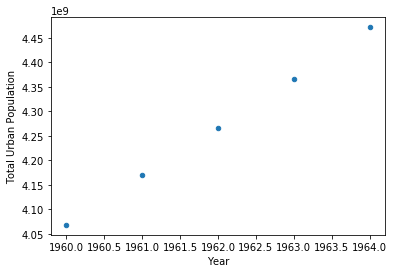

In [33]:
import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

# Get the first dataframe chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB'].copy()

# Zip dataframe columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], 
            df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Use list comprehension to create new dataframe column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()


In the previous exercises, you've only processed the data from the first DataFrame chunk. This time, you will aggregate the results over all the DataFrame chunks in the dataset. This basically means you will be processing the entire dataset now. This is neat because you're going to be able to process the entire large dataset by just working on smaller pieces of it!

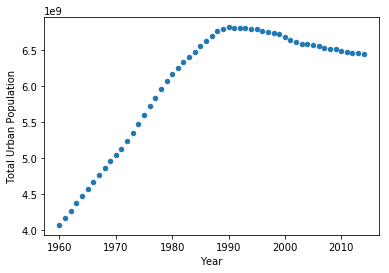

In [34]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize=1000)

# Initialize empty dataframe: data
data = pd.DataFrame()

# Iterate over each dataframe chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB'].copy()

    # Zip dataframe columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new dataframe column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]
    
    # Append dataframe chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()


This is the last leg. You've learned a lot about processing a large dataset in chunks. In this last exercise, you will put all the code for processing the data into a single function so that you can reuse the code without having to rewrite the same things all over again.

You're going to define the function plot_pop() which takes two arguments: the filename of the file to be processed, and the country code of the rows you want to process in the dataset.

Because all of the previous code you've written in the previous exercises will be housed in plot_pop(), calling the function already does the following:

- Loading of the file chunk by chunk,
- Creating the new column of urban population values, and
- Plotting the urban population data.

That's a lot of work, but the function now makes it convenient to repeat the same process for whatever file and country code you want to process and visualize!

Kaggle: https://www.kaggle.com/worldbank/world-development-indicators

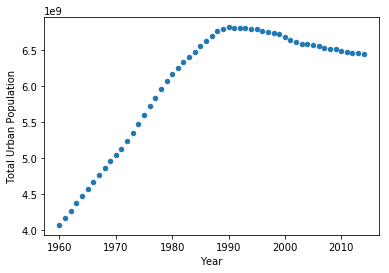

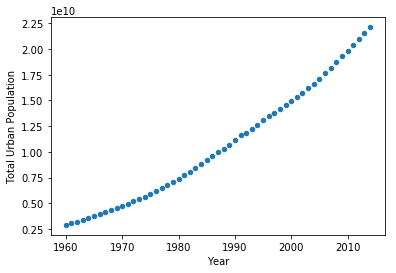

In [36]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty dataframe: data
    data = pd.DataFrame()
    
    # Iterate over each dataframe chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code].copy()

        # Zip dataframe columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new dataframe column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]
    
        # Append dataframe chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop(fn, 'ARB')
